In [82]:
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pickle

from IPython.display import display, Latex
import seaborn as sns

In [59]:
# import data
master = pd.read_csv('Master_NoTest.csv')
master.head()

,Unnamed: 0,index,building,time,device_count,day_name,month,day,year,timestamp,traffic_diff,index_hour
0,0,210,UREC,00:00:17,1,Sunday,9,12,2021,2021-09-12 00:00:17,0.0,0
1,1,42493,UREC,01:00:05,185,Sunday,9,12,2021,2021-09-12 01:00:05,184.0,1
2,2,103667,UREC,02:00:00,498,Sunday,9,12,2021,2021-09-12 02:00:00,313.0,2
3,3,156387,UREC,03:00:23,596,Sunday,9,12,2021,2021-09-12 03:00:23,98.0,3
4,4,201089,UREC,04:02:30,638,Sunday,9,12,2021,2021-09-12 04:02:30,42.0,4


In [62]:
#Make df for each building
selected_buildings = ['UREC', 'Stu', 'Atki', 'Wood', 'SVDH', 'Pros']
buildings_df = {}

for building in selected_buildings:
    buildings_df[building] = master[master['building'] == building]


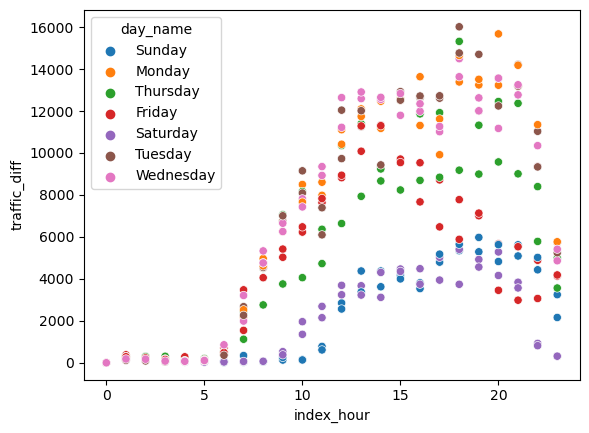

In [63]:
UREC_df = buildings_df['UREC']

sns.scatterplot(x='index_hour', y='traffic_diff', hue='day_name', data=UREC_df)
plt.show()

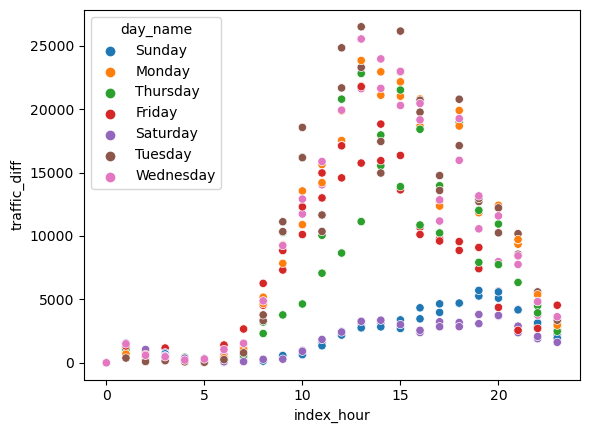

In [64]:
Stu_df = buildings_df['Stu']

sns.scatterplot(x='index_hour', y='traffic_diff', hue='day_name', data=Stu_df)
plt.show()

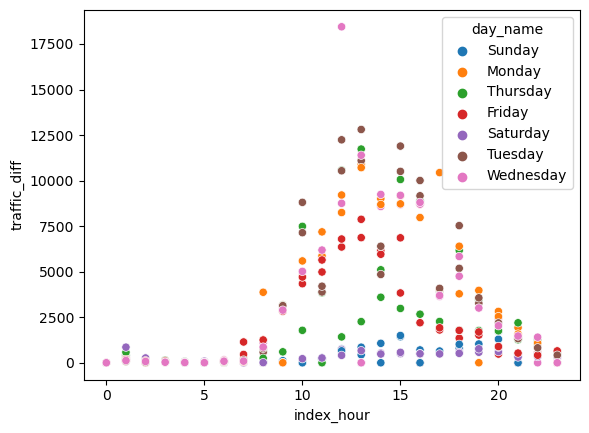

In [65]:
Atki_df = buildings_df['Atki']

sns.scatterplot(x='index_hour', y='traffic_diff', hue='day_name', data=Atki_df)
plt.show()

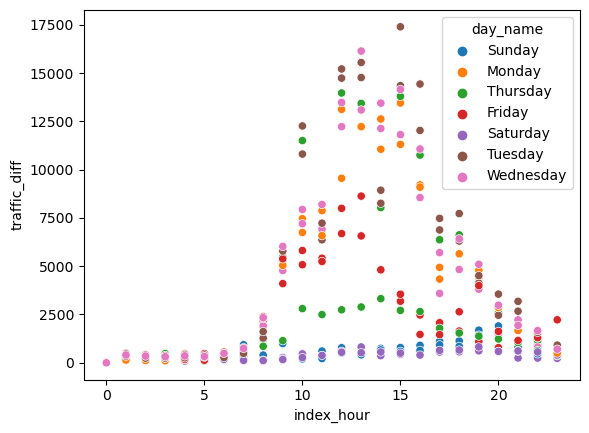

In [66]:
Wood_df = buildings_df['Wood']

sns.scatterplot(x='index_hour', y='traffic_diff', hue='day_name', data=Wood_df)
plt.show()


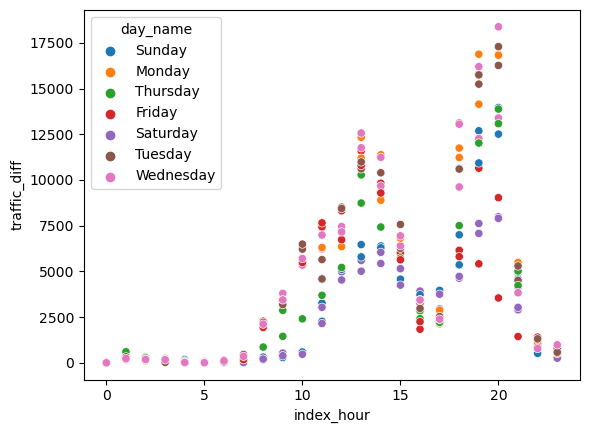

In [67]:
SVDH_df = buildings_df['SVDH']

sns.scatterplot(x='index_hour', y='traffic_diff', hue='day_name', data=SVDH_df)
plt.show()

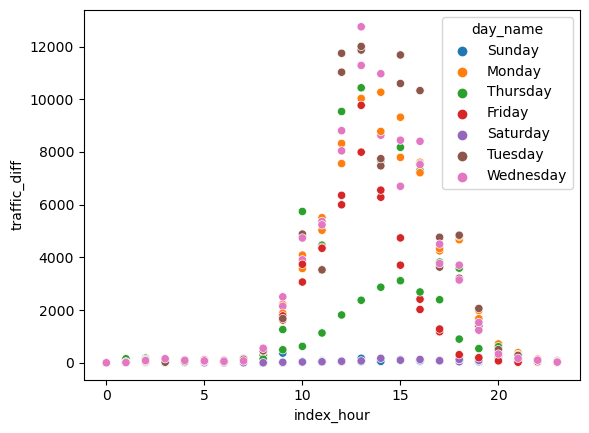

In [68]:
Pros_df = buildings_df['Pros']

sns.scatterplot(x='index_hour', y='traffic_diff', hue='day_name', data=Pros_df)
plt.show()

In [78]:
for building in selected_buildings:
    buildings_df[building] = buildings_df[building].sort_values(by='timestamp')
    display(buildings_df[building].head(15))





,Unnamed: 0,index,building,time,device_count,day_name,month,day,year,timestamp,traffic_diff,index_hour
1584,0,122,UREC,00:00:05,1,Friday,9,3,2021,2021-09-03 00:00:05,0.0,0
1585,1,44312,UREC,01:00:05,287,Friday,9,3,2021,2021-09-03 01:00:05,286.0,1
1586,2,74615,UREC,02:00:17,520,Friday,9,3,2021,2021-09-03 02:00:17,233.0,2
1587,3,98521,UREC,03:00:13,678,Friday,9,3,2021,2021-09-03 03:00:13,158.0,3
1588,4,113797,UREC,04:00:01,762,Friday,9,3,2021,2021-09-03 04:00:01,84.0,4
1589,5,127016,UREC,05:00:01,876,Friday,9,3,2021,2021-09-03 05:00:01,114.0,5
1590,6,162215,UREC,06:00:01,1365,Friday,9,3,2021,2021-09-03 06:00:01,489.0,6
1591,7,237852,UREC,07:00:01,2909,Friday,9,3,2021,2021-09-03 07:00:01,1544.0,7
1592,8,481134,UREC,08:00:00,6964,Friday,9,3,2021,2021-09-03 08:00:00,4055.0,8
1593,9,895582,UREC,09:00:00,11992,Friday,9,3,2021,2021-09-03 09:00:00,5028.0,9


,Unnamed: 0,index,building,time,device_count,day_name,month,day,year,timestamp,traffic_diff,index_hour
1608,0,11,Stu,00:00:00,1,Friday,9,3,2021,2021-09-03 00:00:00,0.0,0
1609,1,44258,Stu,01:00:00,1328,Friday,9,3,2021,2021-09-03 01:00:00,1327.0,1
1610,2,74480,Stu,02:00:02,1984,Friday,9,3,2021,2021-09-03 02:00:02,656.0,2
1611,3,98588,Stu,03:00:32,2350,Friday,9,3,2021,2021-09-03 03:00:32,366.0,3
1612,4,113816,Stu,04:00:05,2499,Friday,9,3,2021,2021-09-03 04:00:05,149.0,4
1613,5,127156,Stu,05:00:32,2550,Friday,9,3,2021,2021-09-03 05:00:32,51.0,5
1614,6,162180,Stu,06:00:00,3951,Friday,9,3,2021,2021-09-03 06:00:00,1401.0,6
1615,7,237880,Stu,07:00:02,6614,Friday,9,3,2021,2021-09-03 07:00:02,2663.0,7
1616,8,481141,Stu,08:00:00,12875,Friday,9,3,2021,2021-09-03 08:00:00,6261.0,8
1617,9,895610,Stu,09:00:00,21724,Friday,9,3,2021,2021-09-03 09:00:00,8849.0,9


,Unnamed: 0,index,building,time,device_count,day_name,month,day,year,timestamp,traffic_diff,index_hour
1632,0,0,Atki,00:00:00,0,Friday,9,3,2021,2021-09-03 00:00:00,0.0,0
1633,1,44254,Atki,01:00:00,180,Friday,9,3,2021,2021-09-03 01:00:00,180.0,1
1634,2,74467,Atki,02:00:00,291,Friday,9,3,2021,2021-09-03 02:00:00,111.0,2
1635,3,98421,Atki,03:00:01,388,Friday,9,3,2021,2021-09-03 03:00:01,97.0,3
1636,4,113789,Atki,04:00:00,406,Friday,9,3,2021,2021-09-03 04:00:00,18.0,4
1637,5,127011,Atki,05:00:01,407,Friday,9,3,2021,2021-09-03 05:00:01,1.0,5
1638,6,162194,Atki,06:00:00,521,Friday,9,3,2021,2021-09-03 06:00:00,114.0,6
1639,7,237797,Atki,07:00:00,978,Friday,9,3,2021,2021-09-03 07:00:00,457.0,7
1640,8,481109,Atki,08:00:00,2229,Friday,9,3,2021,2021-09-03 08:00:00,1251.0,8
1641,9,895546,Atki,09:00:00,5057,Friday,9,3,2021,2021-09-03 09:00:00,2828.0,9


,Unnamed: 0,index,building,time,device_count,day_name,month,day,year,timestamp,traffic_diff,index_hour
1656,0,33,Wood,00:00:00,1,Friday,9,3,2021,2021-09-03 00:00:00,0.0,0
1657,1,44293,Wood,01:00:02,376,Friday,9,3,2021,2021-09-03 01:00:02,375.0,1
1658,2,74518,Wood,02:00:05,664,Friday,9,3,2021,2021-09-03 02:00:05,288.0,2
1659,3,98474,Wood,03:00:08,908,Friday,9,3,2021,2021-09-03 03:00:08,244.0,3
1660,4,114026,Wood,04:01:10,1083,Friday,9,3,2021,2021-09-03 04:01:10,175.0,4
1661,5,127009,Wood,05:00:01,1211,Friday,9,3,2021,2021-09-03 05:00:01,128.0,5
1662,6,162195,Wood,06:00:00,1675,Friday,9,3,2021,2021-09-03 06:00:00,464.0,6
1663,7,237824,Wood,07:00:00,2180,Friday,9,3,2021,2021-09-03 07:00:00,505.0,7
1664,8,481192,Wood,08:00:01,4566,Friday,9,3,2021,2021-09-03 08:00:01,2386.0,8
1665,9,895624,Wood,09:00:00,9951,Friday,9,3,2021,2021-09-03 09:00:00,5385.0,9


,Unnamed: 0,index,building,time,device_count,day_name,month,day,year,timestamp,traffic_diff,index_hour
1680,0,17,SVDH,00:00:00,1,Friday,9,3,2021,2021-09-03 00:00:00,0.0,0
1681,1,44323,SVDH,01:00:06,324,Friday,9,3,2021,2021-09-03 01:00:06,323.0,1
1682,2,74557,SVDH,02:00:10,527,Friday,9,3,2021,2021-09-03 02:00:10,203.0,2
1683,3,98507,SVDH,03:00:11,699,Friday,9,3,2021,2021-09-03 03:00:11,172.0,3
1684,4,114244,SVDH,04:01:52,724,Friday,9,3,2021,2021-09-03 04:01:52,25.0,4
1685,5,128998,SVDH,05:07:59,732,Friday,9,3,2021,2021-09-03 05:07:59,8.0,5
1686,6,162601,SVDH,06:00:21,810,Friday,9,3,2021,2021-09-03 06:00:21,78.0,6
1687,7,238089,SVDH,07:00:09,980,Friday,9,3,2021,2021-09-03 07:00:09,170.0,7
1688,8,481307,SVDH,08:00:02,2912,Friday,9,3,2021,2021-09-03 08:00:02,1932.0,8
1689,9,895564,SVDH,09:00:00,6350,Friday,9,3,2021,2021-09-03 09:00:00,3438.0,9


,Unnamed: 0,index,building,time,device_count,day_name,month,day,year,timestamp,traffic_diff,index_hour
1704,0,717,Pros,00:00:43,0,Friday,9,3,2021,2021-09-03 00:00:43,0.0,0
1705,1,45407,Pros,01:01:52,14,Friday,9,3,2021,2021-09-03 01:01:52,14.0,1
1706,2,74497,Pros,02:00:04,60,Friday,9,3,2021,2021-09-03 02:00:04,46.0,2
1707,3,98414,Pros,03:00:01,147,Friday,9,3,2021,2021-09-03 03:00:01,87.0,3
1708,4,113872,Pros,04:00:28,250,Friday,9,3,2021,2021-09-03 04:00:28,103.0,4
1709,5,127262,Pros,05:00:52,358,Friday,9,3,2021,2021-09-03 05:00:52,108.0,5
1710,6,162227,Pros,06:00:02,447,Friday,9,3,2021,2021-09-03 06:00:02,89.0,6
1711,7,243319,Pros,07:02:45,592,Friday,9,3,2021,2021-09-03 07:02:45,145.0,7
1712,8,481155,Pros,08:00:00,1048,Friday,9,3,2021,2021-09-03 08:00:00,456.0,8
1713,9,895547,Pros,09:00:00,2827,Friday,9,3,2021,2021-09-03 09:00:00,1779.0,9


In [97]:
building_traffic = {}

for building in selected_buildings:
    df = buildings_df[building]
    building_traffic[building] = df['traffic_diff'].copy()
    scaler = MinMaxScaler()
    building_traffic[building]['traffic_diff_reg'] = scaler.fit_transform(building_traffic[building].values.reshape(-1,1))

display(building_traffic['UREC']['traffic_diff_reg'])





array([[0.        ],
       [0.01786049],
       [0.01455068],
       [0.00986698],
       [0.00524574],
       [0.00711922],
       [0.03053769],
       [0.09642166],
       [0.25323175],
       [0.31399488],
       [0.40448386],
       [0.48885281],
       [0.55817149],
       [0.7048648 ],
       [0.70561419],
       [0.59589084],
       [0.47886093],
       [0.40448386],
       [0.367389  ],
       [0.44545057],
       [0.21569974],
       [0.18628614],
       [0.19134453],
       [0.2614126 ],
       [0.        ],
       [0.00749391],
       [0.00555798],
       [0.00312246],
       [0.00474614],
       [0.00599513],
       [0.02241928],
       [0.14132268],
       [0.29750827],
       [0.43739462],
       [0.57128583],
       [0.46143758],
       [0.75188909],
       [0.75014051],
       [0.58889652],
       [0.78161494],
       [0.79397989],
       [0.79460438],
       [0.92200087],
       [0.74957847],
       [0.84693686],
       [0.82320615],
       [0.58296384],
       [0.327

In [138]:
#CHANGE THIS THEN RUN ALL BELOW TO GENERATE NEW PREDS
current_building = 'SVDH'

In [139]:
# Unrestricted model, using string specification
# 'local linear trend'
unrestricted_model = {
    'level': 'local linear trend', 'cycle': True, 'damped_cycle': True, 'stochastic_cycle': True
}


In [140]:
#output
reg_traffic = building_traffic[current_building]
output_mod = sm.tsa.UnobservedComponents(reg_traffic['traffic_diff_reg'], **unrestricted_model)
output_res = output_mod.fit(method='powell', disp=False)


In [141]:
print(output_res.summary())

                            Unobserved Components Results                            
Dep. Variable:                             y   No. Observations:                  336
Model:                    local linear trend   Log Likelihood                 168.186
                   + damped stochastic cycle   AIC                           -324.373
Date:                       Thu, 15 Dec 2022   BIC                           -301.542
Time:                               02:18:01   HQIC                          -315.268
Sample:                                    0                                         
                                       - 336                                         
Covariance Type:                         opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.0004      0.001      0.392      0

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\structural.py:1738: RuntimeWarning: invalid value encountered in sqrt
  std_errors = np.sqrt(component_bunch['%s_cov' % which])


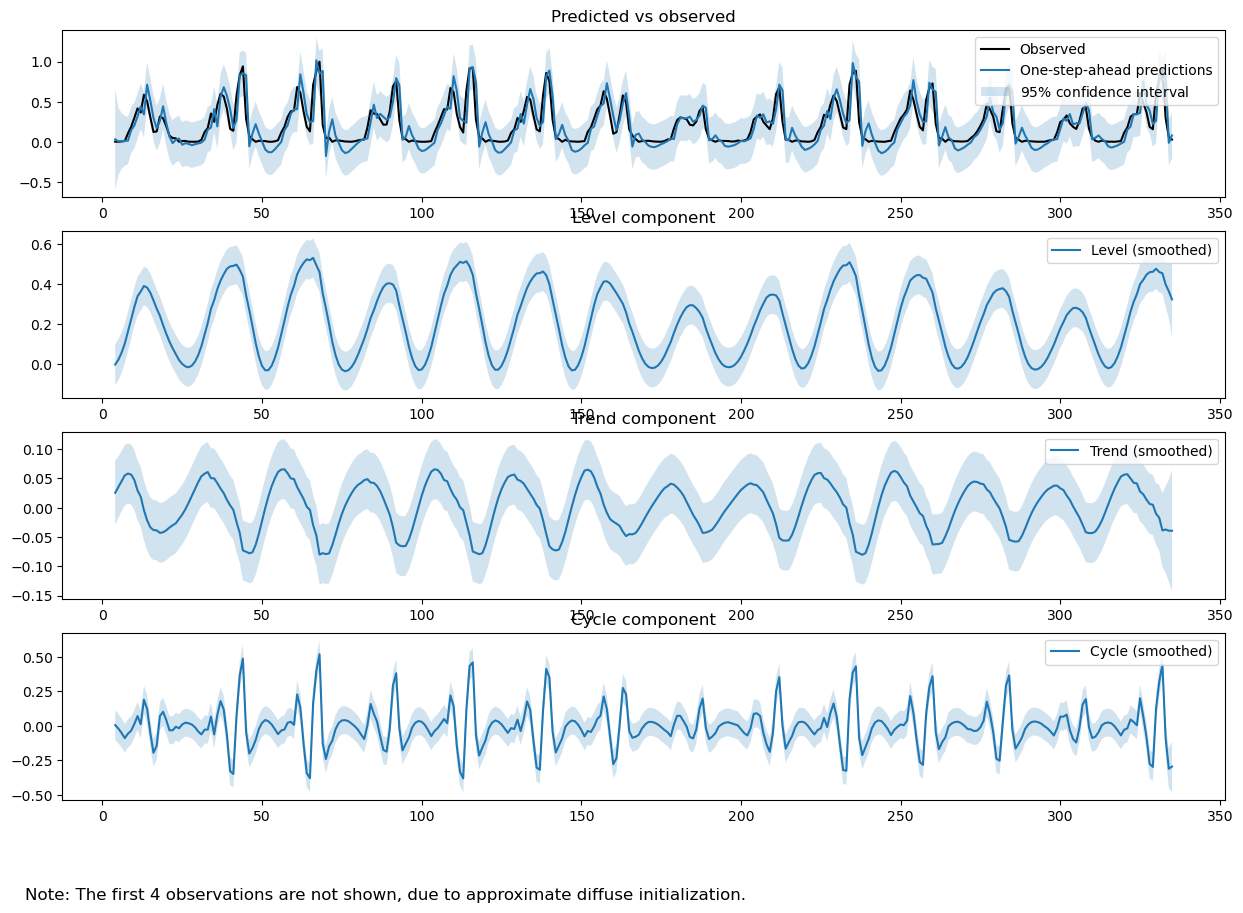

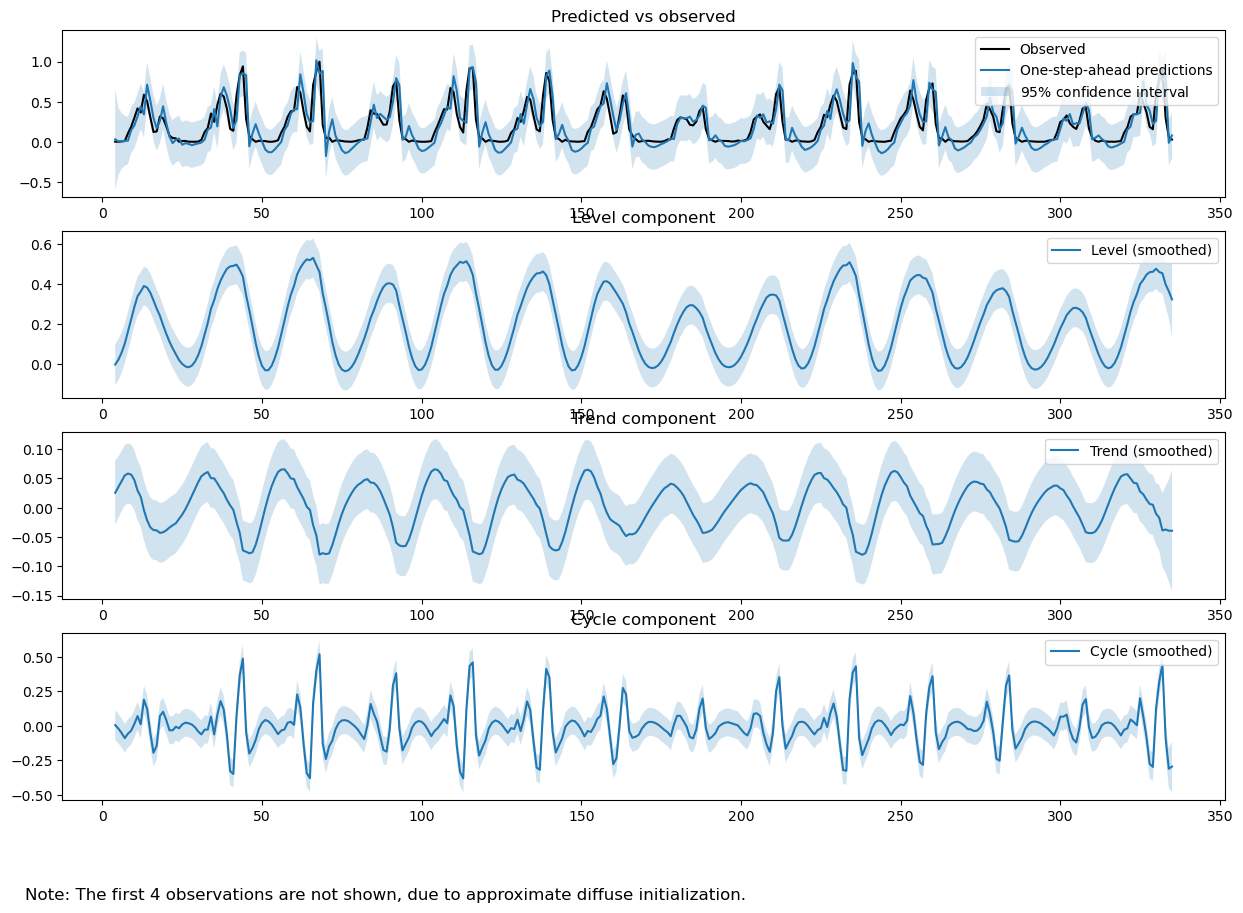

In [142]:
# plot
output_res.plot_components(figsize=(15, 10))

In [143]:
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [144]:
# Generate predictions using the fitted model
reg_traffic = building_traffic[current_building]
predictions = output_res.predict()

#Use pickle to save predictions
pickle.dump(predictions, open('./SavedPredictions/' + current_building + 'predictions.pkl', 'wb'))

# Calculate root mean squared error
rmse = sqrt(mean_absolute_error(reg_traffic['traffic_diff_reg'], predictions))

# Calculate coefficient of determination (R^2)
r2 = r2_score(reg_traffic['traffic_diff_reg'], predictions)

# Print the results
print("RMSE: ", rmse)
print("R^2: ", r2)



RMSE:  0.32144036440076523
R^2:  0.6268820833010107


In [145]:
# Create an empty dictionary
traffic_dict = {}

# Add the data to the dictionary
traffic_dict['Monday'] = [96, 312]
traffic_dict['Tuesday'] = [24, 216]
traffic_dict['Wednesday'] = [48, 240]
traffic_dict['Thursday'] = [120, 264]
traffic_dict['Friday'] = [0, 144]
traffic_dict['Saturday'] = [168, 288]
traffic_dict['Sunday'] = [72, 192]

# Print the dictionary
print(traffic_dict)


{'Monday': [96, 312], 'Tuesday': [24, 216], 'Wednesday': [48, 240], 'Thursday': [120, 264], 'Friday': [0, 144], 'Saturday': [168, 288], 'Sunday': [72, 192]}


In [146]:
def predict_traffic(day, hour):

    prediction = 0  

    for value in traffic_dict[day]:
        prediction += predictions[value + hour]
    
    prediction = round(abs(((prediction / 2)*10)))
    print(prediction)

predict_traffic('Tuesday', 21) 
        
    

8
